<a href="https://colab.research.google.com/github/JCScheunemann/wine_quality/blob/master/winequality_describe_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Exploração inicial dos dados

In [0]:
# Reading the csv data file into a Pandas data frame
winedata = pd.read_csv('data/winequality-white.csv')

winedata.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [0]:
winedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [0]:
winedata["quality"].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

#### OBSERVAÇÕES (Bermudez):

1. Olhando essas informações, parece não haver valores nulos nem *NaN*.
2. O atributo *quality* é inteiro e pode assumir apenas 10 valores. Assim, o problema pode ser encaminhado como um problema de classificação com 10 classes, ou como um problema de regressão, em que o resultado para um novo vonho testado será um número real entre 0 e 10.
3. Note que o número de amostras dentro do conjunto de dados é bastante diferente para diferentes classes (ou valores de saída).  Isso precisa ser levado em consideração no momento de separarmos o conjunto de teste. 

Um cálculo de probabilidade mostra que, em uma amostragem aleatória do conjunto de dados

$$P(\text{pelo menos 1 amostra com nota 9}) \approx 33\% $$

Isso quer dizer que em $67\%$ das vezes que sortearmos um conjunto de testes, esse conjunto não conterá nenhuma amostra classificada com nota 9. Comparativamente, se o conjunto de dados fosse equilibrado ($\approx 544$ amostras por nota), essa probabilidade seria basicamente igual a zero. 

O mesmo raciocínio vale para as outras "classes", embora o problema seja menor.

In [0]:
winedata.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


#### OBSERVAÇÕES (Bermudez):

1. Note que as faixas dos valores dos diferentes atributos são bem diferentes em alguns casos.  Talvez seja interessante pensar em um escalamento de variáveis para melhor equalizar essas valores máximos e mínimos.

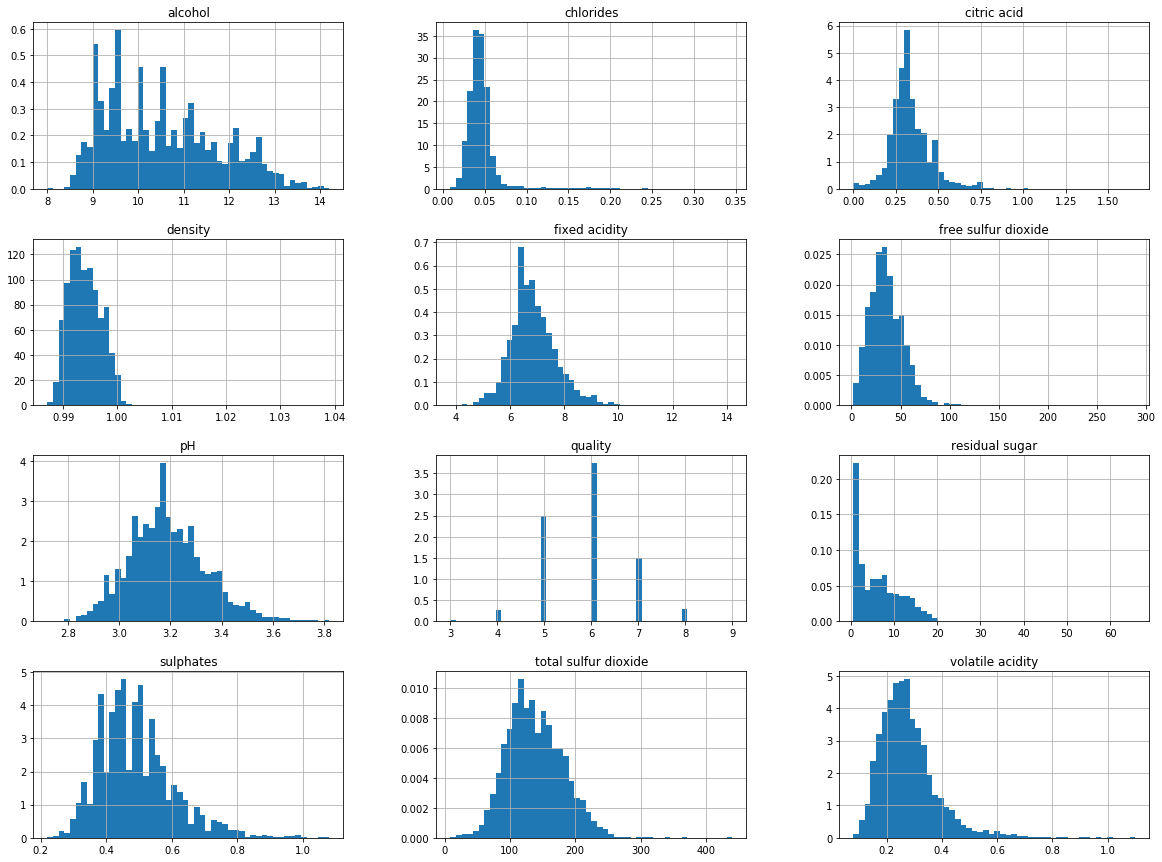

In [0]:
winedata.hist(bins=50, figsize=(20,15), density=True)
plt.show()

#### OBSERVAÇÕES (Bermudez):

1. Muitos desses histogramas são assimétricos.  Muitos métodos de classificação ou de regressão tendem a gerar melhores resultados quando aplicados a dados cujas distribuições não tenham *caudas* longas (sejam assimétricas). Pode-se pensar em transformações de variáveis que corrijam um pouco a assimetria das distribuições.
2. Não devemos fazer qualquer alteração nos dados antes de separarmos o conjunto de teste.
3. Ao separarmos o conjunto de teste, devemos nos preocupar com a questão do número de amostras de cada "classe" no conjunto de dados não ser o mesmo.